In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
import shap

from sklearn.model_selection import train_test_split

/Users/aseltoktogulova/opt/anaconda3/envs/fin/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
model = xgb.Booster()
model.load_model('models/xgboost.model')

In [7]:
df = pd.read_csv('data/creditcard_newds.csv')
ds = df.to_numpy()
y = ds[:, -1] # for last column
x = ds[:, :-1] # for all but last column
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

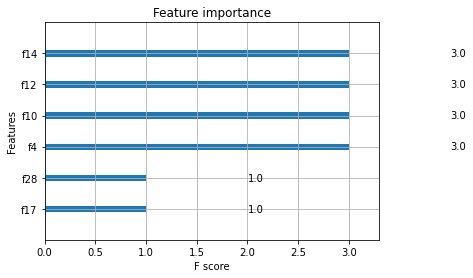

In [8]:
xgb.plot_importance(model)
#xgb.to_graphviz(model)

In [9]:
Xd = xgb.DMatrix(X_train, label=y_train)

pred = model.predict(Xd, output_margin=True)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xd)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

1.7881393e-07

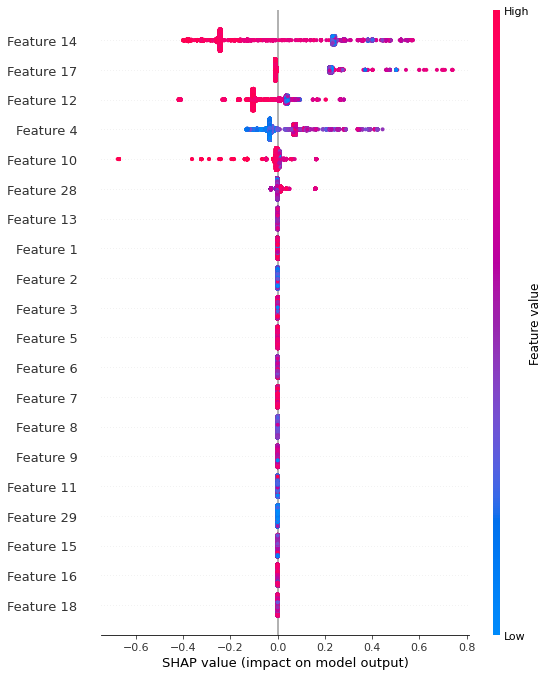

In [10]:
shap.summary_plot(shap_values, X_train)